# Links úteis para se usar datas para treinar modelo 
https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn


### Para treinar o modelo fazer onehot encoding para distritos e concelhos e ignorar as localidas (para não ficarmos com um nº ridiculo de colunas)

In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import sklearn.metrics as metrics

In [170]:
data = pd.read_csv('data/anpc_final.csv')

C:\Users\tiago\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573971 entries, 0 to 573970
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Numero                                  573971 non-null  object 
 1   DataOcorrencia                          573966 non-null  object 
 2   DataFechoOperacional                    418785 non-null  object 
 3   Natureza                                573966 non-null  object 
 4   EstadoOcorrencia                        573966 non-null  object 
 5   Distrito                                573966 non-null  object 
 6   Concelho                                573966 non-null  object 
 7   Freguesia                               573964 non-null  object 
 8   Localidade                              573964 non-null  object 
 9   Latitude                                573962 non-null  object 
 10  Longitude                               5739

In [172]:
data.describe()

,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
count,573962.000000,573962.000000,573962.000000,573962.000000
mean,1.522423,4.114807,0.018506,0.025385
std,2.303219,8.293575,0.220632,0.351961
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000
75%,1.000000,4.000000,0.000000,0.000000
max,354.000000,2170.000000,41.000000,61.000000


In [173]:
data.head(3)

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
0,2016150002576,09/01/2016 14:02:00,09/01/2016 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0
1,2016010098470,10/01/2016 00:30:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0
2,2016020002249,24/01/2016 18:57:00,24/01/2016 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0


In [174]:
# Temos que ver se conmpensa mais usar as 'Naturezas' juntas ou separar 
data.Natureza.unique().shape

(105,)

In [175]:
#Número de ocorencias por distrito

data.groupby(['Distrito']).size().sort_values(ascending=False)

Distrito
LISBOA              97695
PORTO               93203
BRAGA               42017
SETÚBAL             41425
AVEIRO              41361
SANTARÉM            33464
VISEU               30291
FARO                29947
LEIRIA              29685
COIMBRA             25495
VILA REAL           17934
BRAGANÇA            15863
VIANA DO CASTELO    15282
GUARDA              13423
CASTELO BRANCO      12912
BEJA                12011
PORTALEGRE          11550
ÉVORA               10406
0                       2
dtype: int64

In [176]:
data.Distrito.isna().sum()

5

In [177]:
data[data['Distrito'] == '0']

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
83938,LAR SAO JOSE,"39,5983240486353","-8,39819137470253",1,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262081,Travessa da Água da Flor - Frent PSP,"38,71853771","-9,165754765",1,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#Retirar ocorrências sem distrito definido
data.drop(data[data['Distrito'] == '0'].index, inplace=True)

distrito.rename(columns={"Distrito": "Distrito", "Ocorrências"})
distrito[1:3]

In [179]:
distrito=data.groupby(['Distrito']).size().sort_values(ascending=False)
distrito

Distrito
LISBOA              97695
PORTO               93203
BRAGA               42017
SETÚBAL             41425
AVEIRO              41361
SANTARÉM            33464
VISEU               30291
FARO                29947
LEIRIA              29685
COIMBRA             25495
VILA REAL           17934
BRAGANÇA            15863
VIANA DO CASTELO    15282
GUARDA              13423
CASTELO BRANCO      12912
BEJA                12011
PORTALEGRE          11550
ÉVORA               10406
dtype: int64

In [180]:
data[1:3]

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
1,2016010098470,10/01/2016 00:30:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0
2,2016020002249,24/01/2016 18:57:00,24/01/2016 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0


In [181]:
##HISTOGRAMA NÚMERO DE OCORRêNCIAS POR DISTRITO## 

In [182]:
# Mostrar ocorrências por distrito num mapa (ideia possível e que o sérgio vai gostar, mas temos que discutir isto melhor)

In [183]:
data.DataOcorrencia = pd.to_datetime(data.DataOcorrencia)
data.DataOcorrencia.dt.year.unique()

array([2016.,   nan, 2017., 2018.])

In [184]:
data.DataFechoOperacional = pd.to_datetime(data.DataFechoOperacional)

In [185]:
data.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
0,2016150002576,2016-09-01 14:02:00,2016-09-01 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0
1,2016010098470,2016-10-01 00:30:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0
2,2016020002249,2016-01-24 18:57:00,2016-01-24 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0
3,2016050041560,2016-01-30 23:38:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,"39,6684201","-8,146938534",1.0,2.0,0.0,0.0
4,2016020003825,2016-02-13 00:10:00,2016-02-13 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0


<AxesSubplot:xlabel='Distrito', ylabel='NumeroOperacionaisTerrestresEnvolvidos'>

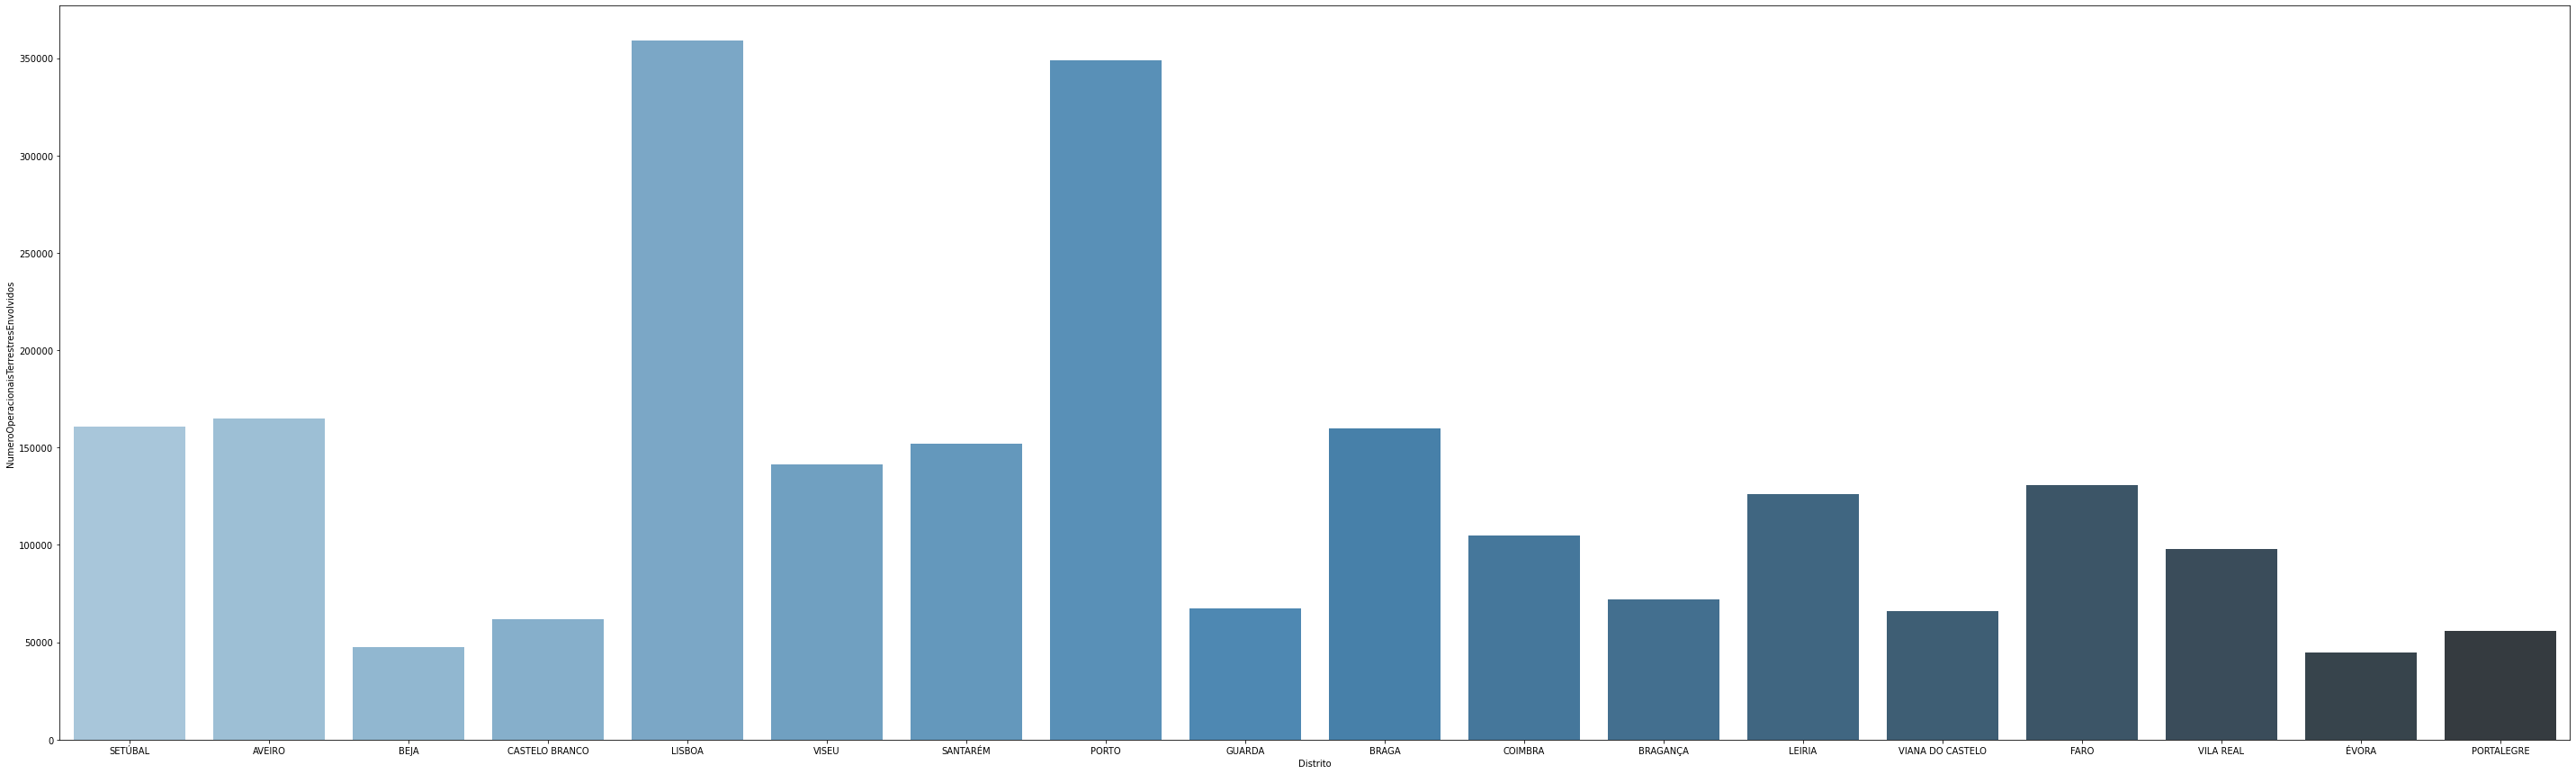

In [186]:
plt.figure(figsize=(50,15))
sns.barplot(
    y="NumeroOperacionaisTerrestresEnvolvidos", 
    x="Distrito", 
    data=data,
    palette="Blues_d",
    estimator=sum, 
    ci=None)

In [187]:
data.Natureza.unique()

array(['Protecção e Assistência a Pessoas e Bens / Assistência e Prevenção a actividades humanas / Prevenção a actividades de lazer',
       'Protecção e Assistência a Pessoas e Bens / Assistência e Prevenção a actividades humanas / Limpeza de Via e Sinalização de Perigo',
       'Protecção e Assistência a Pessoas e Bens / Assistência em Saúde / Intoxicação',
       'Protecção e Assistência a Pessoas e Bens / Assistência em Saúde / Trauma',
       'Riscos Mistos / Incêndios Rurais / Povoamento Florestal',
       'Riscos Tecnológicos / Incêndios Urbanos ou em Área Urbanizável / Habitacional',
       'Riscos Mistos / Incêndios Rurais / Mato',
       'Riscos Mistos / Incêndios Rurais / Gestão de Combustível',
       'Riscos Tecnológicos / Acidentes / Colisão rodoviária',
       'Riscos Mistos / Comprometimento total ou parcial de segurança, serviços ou estruturas / Queda de Árvore',
       'Riscos Tecnológicos / Acidentes / Atropelamento rodoviário',
       'Riscos Tecnológicos / Acidente

In [188]:
# Creating the column representing the ammout of time necessary to solve each occurrence
data['TempoResolucao'] = (data.DataFechoOperacional - data.DataOcorrencia)
data.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao
0,2016150002576,2016-09-01 14:02:00,2016-09-01 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,0 days 03:28:00
1,2016010098470,2016-10-01 00:30:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0,NaT
2,2016020002249,2016-01-24 18:57:00,2016-01-24 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,0 days 00:56:00
3,2016050041560,2016-01-30 23:38:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,"39,6684201","-8,146938534",1.0,2.0,0.0,0.0,NaT
4,2016020003825,2016-02-13 00:10:00,2016-02-13 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,0 days 01:25:00


In [189]:
# Checking for negative resolution times
data[data.TempoResolucao.dt.days < 0]

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao
167,2016080013232,2016-03-31 22:59:00,2016-01-04 01:47:00,Riscos Tecnológicos / Acidentes / Colisão rodo...,Encerrada,FARO,CASTRO MARIM,Altura,Altura,"37,182018","-7,501312",4.0,9.0,0.0,0.0,-88 days +02:48:00
411,2016100021726,2016-04-26 18:54:00,2016-01-10 01:00:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LEIRIA,BOMBARRAL,Bombarral e Vale Covo,BOMBARRAL,"39,26731314","-9,171316061",0.0,0.0,0.0,0.0,-108 days +06:06:00
457,2016130063262,2016-04-29 19:40:00,2016-01-10 01:00:00,Riscos Mistos / Incêndios Rurais / Povoamento ...,Encerrada,PORTO,VILA DO CONDE,Retorta e Tougues,TOUGUES,"41,355923","-8,710585",0.0,0.0,0.0,0.0,-111 days +05:20:00
468,2016130063862,2016-04-30 23:40:00,2016-01-05 00:24:00,Riscos Mistos / Incêndios Rurais / Mato,Encerrada,PORTO,PENAFIEL,Perozelo,PEROZELO,"41,155528","-8,260287",3.0,13.0,0.0,0.0,-117 days +00:44:00
469,2016110076737,2016-04-30 22:48:00,2016-01-05 00:24:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LISBOA,LOURES,Loures,A-dos-Cães,"38,84072474","-9,23072896",1.0,2.0,0.0,0.0,-117 days +01:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557694,2018130193923,2018-11-30 22:12:00,2018-01-12 02:30:00,Protecção e Assistência a Pessoas e Bens / Int...,Encerrada,PORTO,BAIÃO,Teixeira e Teixeiró,TEIXEIRÓ,"41,187259","-7,907858",1.0,2.0,0.0,0.0,-323 days +04:18:00
557713,2018140073836,2018-11-30 21:24:00,2018-01-12 00:19:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SANTARÉM,CARTAXO,Cartaxo e Vale da Pinta,Cartaxo,"39,1637329581298","-8,80302088990241",1.0,2.0,0.0,0.0,-323 days +02:55:00
557717,2018110241552,2018-11-30 21:20:00,2018-01-12 01:02:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LISBOA,LISBOA,Benfica,Benfica,"38,744634","-9,19935",1.0,2.0,0.0,0.0,-323 days +03:42:00
557789,2018140073820,2018-11-30 19:41:00,2018-01-12 00:00:00,Riscos Tecnológicos / Acidentes / Colisão rodo...,Encerrada,SANTARÉM,SARDOAL,Alcaravela,SARDOAL,"39,584872","-8,144537",8.0,21.0,0.0,0.0,-323 days +04:19:00


In [190]:
# Removing negative times of resolution
data.drop(data[data.TempoResolucao.dt.days < 0].index, inplace=True)

In [191]:
data.Natureza.isna().sum()
data[data.Natureza.isna()]

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao
83933,\t\t\t\t\t\t\t\t,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
83934,10.15\tTomar\tIPO\t\t\t\tS\t\tS,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
83935,11.30\tTomar\tIPO\t\t\t\tS\t\tN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
83936,\t\t\t\t\t\t\t\t,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
83937,13.15\tTomar\tIPO\t\t\t\tS\t\tS,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [192]:
# Droping useless rows
data.dropna(subset=['Natureza'], inplace=True)
data[data.Natureza.isna()]

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao


In [193]:
data=data.replace({'Latitude': ','}, {'Latitude': '.'}, regex=True)
data=data.replace({'Longitude': ','}, {'Longitude': '.'}, regex=True)
data[1:3]

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao
1,2016010098470,2016-10-01 00:30:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,40.6927855,-8.479686736,0.0,0.0,0.0,0.0,NaT
2,2016020002249,2016-01-24 18:57:00,2016-01-24 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6",37.71278977,-8.091107843,2.0,4.0,0.0,0.0,0 days 00:56:00


In [194]:
data['Latitude'] = data['Latitude'].astype('float')
data['Longitude'] = data['Longitude'].astype('float')

In [195]:
corr = data[['Latitude', 'Longitude', 'NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos', 'NumeroMeiosAereosEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos', 'TempoResolucao']].corr()

<AxesSubplot:>

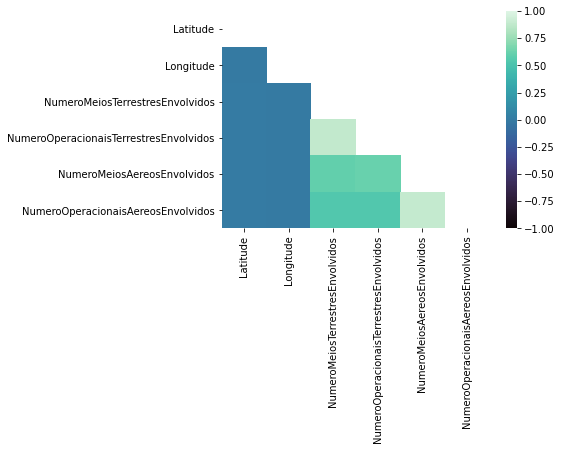

In [196]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1,
        cmap='mako', 
        mask=mask)

Gráfico mostra que a correlação entre as latitude e logitude com as restantes variáveis é próximo de 0

Como seria de esperar a correlação entre número de meios aéreos e número de operacionais aéreos é próximo de 1, o mesmo acontece para os meios terrestres

Os meios aeréros e terrestres, assim como os operacionais têm uma correlação próxima 0.5

In [197]:
data[['NumeroMeiosAereosEnvolvidos', 'NumeroMeiosTerrestresEnvolvidos']].corr()

,NumeroMeiosAereosEnvolvidos,NumeroMeiosTerrestresEnvolvidos
NumeroMeiosAereosEnvolvidos,1.000000,0.606556
NumeroMeiosTerrestresEnvolvidos,0.606556,1.000000


In [198]:
data[['NumeroOperacionaisTerrestresEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos']].corr()

,NumeroOperacionaisTerrestresEnvolvidos,NumeroOperacionaisAereosEnvolvidos
NumeroOperacionaisTerrestresEnvolvidos,1.000000,0.545391
NumeroOperacionaisAereosEnvolvidos,0.545391,1.000000


In [199]:
round(data['NumeroOperacionaisTerrestresEnvolvidos'].sum()/data['NumeroMeiosTerrestresEnvolvidos'].sum(),0)

3.0

In [200]:
round(data['NumeroOperacionaisAereosEnvolvidos'].sum()/data['NumeroMeiosAereosEnvolvidos'].sum(),0)

1.0

Em média temos 3 operacionais terrestres para cada meio terrestre

Em média temos 1 operacional aéro para cada meio aéreo

In [201]:
data.EstadoOcorrencia.unique()

array(['Encerrada', 'Em Curso', 'Falso Alarme', 'Falso Alerta',
       'Conclusão', 'Despacho', 'Despacho de 1º Alerta', 'Em Resolução',
       'Chegada ao TO', 'Vigilância'], dtype=object)

In [202]:
data[data.EstadoOcorrencia == 'Em Curso']
# Podemos incluir isto para a análise a nível de ocorrências por distrito e assim, mas depois temos que dar drop disto
# temos que discutir isto melhor

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao
1,2016010098470,2016-10-01 00:30:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,40.692785,-8.479687,0.0,0.0,0.0,0.0,NaT
3,2016050041560,2016-01-30 23:38:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,39.668420,-8.146939,1.0,2.0,0.0,0.0,NaT
119819,2016080056628,2016-12-29 18:56:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,FARO,ALBUFEIRA,Albufeira e Olhos de Água,ALBUFEIRA,37.091727,-8.252292,1.0,2.0,0.0,0.0,NaT
119823,2016090039202,2016-12-29 18:53:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,GUARDA,SEIA,Pinhanços,Lar Pinhanços,40.469425,-7.688957,1.0,2.0,0.0,0.0,NaT
119842,2016080056622,2016-12-29 17:52:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,FARO,OLHÃO,Olhão,OLHÃO,37.022054,-7.843133,1.0,2.0,0.0,0.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573939,2018150114444,2018-12-31 03:57:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,SETÚBAL,SEIXAL,Amora,Amora,38.613880,-9.128863,1.0,2.0,0.0,0.0,NaT
573948,2018150114435,2018-12-31 03:18:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,SETÚBAL,GRÂNDOLA,Grândola e Santa Margarida da Serra,GRANDOLA,38.182592,-8.560713,1.0,2.0,0.0,0.0,NaT
573949,2018100076402,2018-12-31 03:08:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,LEIRIA,LEIRIA,Monte Redondo e Carreira,União das Freguesias de Monte Redondo e Carreira,39.894750,-8.839742,1.0,2.0,0.0,0.0,NaT
573953,2018150114431,2018-12-31 02:41:00,NaT,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,SETÚBAL,ALMADA,"Almada, Cova da Piedade, Pragal e Cacilhas",Cacilhas,38.675268,-9.164498,0.0,0.0,0.0,0.0,NaT


# Começar a experimentar com o modelo

In [203]:
enc = OneHotEncoder()
scaler = MaxAbsScaler()

In [204]:
data_modelo = data.copy()
data_modelo.TempoResolucao = data_modelo.TempoResolucao.dt.total_seconds()
# converter novamente para dias
#data.TempoResolucao = pd.to_timedelta(data.TempoResolucao, unit='s')
data_modelo.drop(columns=['Numero','DataOcorrencia', 'DataFechoOperacional', 'EstadoOcorrencia', 'Freguesia', 'Localidade'], inplace=True)
data_modelo.head()

,Natureza,Distrito,Concelho,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,TempoResolucao
0,Protecção e Assistência a Pessoas e Bens / Ass...,SETÚBAL,MOITA,38.680912,-9.002235,1.0,3.0,0.0,0.0,12480.0
1,Protecção e Assistência a Pessoas e Bens / Ass...,AVEIRO,ALBERGARIA-A-VELHA,40.692785,-8.479687,0.0,0.0,0.0,0.0,NaN
2,Protecção e Assistência a Pessoas e Bens / Ass...,BEJA,CASTRO VERDE,37.712790,-8.091108,2.0,4.0,0.0,0.0,3360.0
3,Protecção e Assistência a Pessoas e Bens / Ass...,CASTELO BRANCO,VILA DE REI,39.668420,-8.146939,1.0,2.0,0.0,0.0,NaN
4,Protecção e Assistência a Pessoas e Bens / Ass...,BEJA,CASTRO VERDE,37.614971,-7.962115,1.0,2.0,0.0,0.0,5100.0


In [205]:
data_modelo.isna().sum()

Natureza                                       0
Distrito                                       0
Concelho                                       0
Latitude                                       2
Longitude                                      2
NumeroMeiosTerrestresEnvolvidos                2
NumeroOperacionaisTerrestresEnvolvidos         2
NumeroMeiosAereosEnvolvidos                    2
NumeroOperacionaisAereosEnvolvidos             2
TempoResolucao                            155181
dtype: int64

In [206]:
data_modelo.dropna(inplace=True)
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417694 entries, 0 to 573970
Data columns (total 10 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Natureza                                417694 non-null  object 
 1   Distrito                                417694 non-null  object 
 2   Concelho                                417694 non-null  object 
 3   Latitude                                417694 non-null  float64
 4   Longitude                               417694 non-null  float64
 5   NumeroMeiosTerrestresEnvolvidos         417694 non-null  float64
 6   NumeroOperacionaisTerrestresEnvolvidos  417694 non-null  float64
 7   NumeroMeiosAereosEnvolvidos             417694 non-null  float64
 8   NumeroOperacionaisAereosEnvolvidos      417694 non-null  float64
 9   TempoResolucao                          417694 non-null  float64
dtypes: float64(7), object(3)
memory usage: 35.1+

In [207]:
X = data_modelo.drop(columns=['TempoResolucao']).copy()
y = data_modelo.TempoResolucao.copy()

In [208]:
X = enc.fit_transform(X)
X = scaler.fit_transform(X)
X

<417694x157410 sparse matrix of type '<class 'numpy.float64'>'
	with 3759246 stored elements in Compressed Sparse Row format>

In [209]:
y = y.ravel()

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

pred_y = reg.predict(X_test)

In [211]:

print("The first five prediction {}".format(pred_y[:5]))
print("The real first five labels {}".format(y_test[:5]))

The first five prediction [116571.07804817   4934.82489726   3030.59090412  58790.79644431
  36407.01863969]
The real first five labels [8880. 2760. 5400. 3480. 5760.]


In [212]:
mse = metrics.mean_squared_error(y_test, pred_y)
print(f"Mean Squared Error {mse}")

Mean Squared Error 405315123802.2476


## Outra versao para depois comparar, não é relevante por agora

In [213]:
data_v2 = data.copy()
data_v2['Natureza'] = data_v2['Natureza'].apply(lambda x: x.split(' / '))

In [214]:
columns = pd.DataFrame(data_v2['Natureza'].tolist())
columns


,0,1,2,3
0,Protecção e Assistência a Pessoas e Bens,Assistência e Prevenção a actividades humanas,Prevenção a actividades de lazer,None
1,Protecção e Assistência a Pessoas e Bens,Assistência e Prevenção a actividades humanas,Limpeza de Via e Sinalização de Perigo,None
2,Protecção e Assistência a Pessoas e Bens,Assistência em Saúde,Intoxicação,None
3,Protecção e Assistência a Pessoas e Bens,Assistência em Saúde,Trauma,None
4,Protecção e Assistência a Pessoas e Bens,Assistência em Saúde,Intoxicação,None
...,...,...,...,...
572872,Riscos Mistos,Incêndios Rurais,Povoamento Florestal,None
572873,Protecção e Assistência a Pessoas e Bens,Assistência em Saúde,Intoxicação,None
572874,Protecção e Assistência a Pessoas e Bens,Assistência em Saúde,Trauma,None
572875,Protecção e Assistência a Pessoas e Bens,Assistência em Saúde,Trauma,None


In [215]:
columns.groupby([0]).size().sort_values(ascending=False)

0
Protecção e Assistência a Pessoas e Bens    401813
Riscos Mistos                                86344
Riscos Tecnológicos                          82791
Operações  e Estados de Alerta                1785
Riscos Naturais                                144
dtype: int64

In [216]:
columns.groupby([1]).size().sort_values(ascending=False)

1
Assistência em Saúde                                                     266215
Assistência e Prevenção a actividades humanas                            111003
Acidentes                                                                 55929
Incêndios Rurais                                                          54174
Intervenção em conflitos legais                                           24595
Comprometimento total ou parcial de segurança, serviços ou estruturas     22282
Incêndios Urbanos ou em Área Urbanizável                                  16195
Incêndios em Detritos                                                      9888
Incêndios em Transportes                                                   5163
Incêndios em Equipamento e Produtos                                        3376
Acidentes industriais e tecnológicos                                       2128
Operações                                                                  1785
Fenómenos Naturais                    

In [217]:
len(columns[1].unique())

13

In [218]:
len(columns[2].unique())

103

In [219]:
columns[3].unique()

array([None, 'Tamponamento'], dtype=object)

## Acho que deveriamos retirar coluna 3 e mantinha separadas. Podemos prever separadamente, vamos conseguir mostrar bons resultados pelo menos na coluna 0 e 1 
Coluna 0 - 5 resultados únicos

Coluna 1 - 13 resultados únicos

Coluna 2 - 103 resultados únicos

In [220]:
new_columns = np.concatenate((columns[0].unique(),columns[1].unique(),columns[2].unique(),columns[3].unique()))
new_columns = new_columns[new_columns != np.array(None)]
new_columns = new_columns.tolist()
new_columns

['Protecção e Assistência a Pessoas e Bens',
 'Riscos Mistos',
 'Riscos Tecnológicos',
 'Riscos Naturais',
 'Operações  e Estados de Alerta',
 'Assistência e Prevenção a actividades humanas',
 'Assistência em Saúde',
 'Incêndios Rurais',
 'Incêndios Urbanos ou em Área Urbanizável',
 'Acidentes',
 'Comprometimento total ou parcial de segurança, serviços ou estruturas',
 'Incêndios em Transportes',
 'Intervenção em conflitos legais',
 'Acidentes industriais e tecnológicos',
 'Incêndios em Detritos',
 'Incêndios em Equipamento e Produtos',
 'Fenómenos Naturais',
 'Operações',
 'Prevenção a actividades de lazer',
 'Limpeza de Via e Sinalização de Perigo',
 'Intoxicação',
 'Trauma',
 'Povoamento Florestal',
 'Habitacional',
 'Mato',
 'Gestão de Combustível',
 'Colisão rodoviária',
 'Queda de Árvore',
 'Atropelamento rodoviário',
 'Despiste',
 'Busca e Resgate Terrestre, de Animais',
 'Abastecimento de Água à População',
 'Dano em redes de abastecimento de água',
 'Dano ou Queda de redes de 

In [221]:
data_v2 = data_v2.assign(**dict.fromkeys(new_columns, 0))

Dados entre os anos 2016 e 2018 - comparar com populção por distrito 

In [222]:
pd.read_excel('data/pop.xlsx')

,Nome,Divisão Administrativa,População Residente,População/km2,Ano*
0,Lisboa,Distrito Administrativo,2275591,824.2,2021
1,Porto,Distrito Administrativo,1786656,746.0,2021
2,Setúbal,Distrito Administrativo,875656,172.9,2021
3,Braga,Distrito Administrativo,846515,312.8,2021
4,Aveiro,Distrito Administrativo,700964,250.5,2021
5,Faro,Distrito Administrativo,467495,94.6,2021
6,Leiria,Distrito Administrativo,458679,130.9,2021
7,Santarém,Distrito Administrativo,425431,67.9,2021
8,Coimbra,Distrito Administrativo,408631,103.5,2021
9,Viseu,Distrito Administrativo,351592,70.2,2021


## Useful snippet to use later when dealing with training the model

In [223]:
# Convert to time in seconds to use as regression label
x = data.TempoResolucao
y = x.dt.total_seconds()
# Convert back to datetime object
z = pd.to_timedelta(y, unit='s')
z


0        0 days 03:28:00
1                    NaT
2        0 days 00:56:00
3                    NaT
4        0 days 01:25:00
               ...      
573966   0 days 00:53:00
573967   0 days 01:41:00
573968   0 days 02:48:00
573969   0 days 01:46:00
573970   0 days 23:59:00
Name: TempoResolucao, Length: 572877, dtype: timedelta64[ns]